<a href="https://colab.research.google.com/github/Lucid-Lifo/Data-Analysis-Using-Python/blob/main/Lab_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''Visualize the following using the given dataset- alphabet_stock_data.csv
a. Create a line plot of the historical stock prices of Alphabet Inc. between two
specific dates.
b. Create a bar plot of the trading volume of Alphabet Inc. stock between two
specific dates.
c. Create a stacked histogram plot with more bins of opening, closing, high, and low
stock prices of Alphabet Inc. between two specific dates.
d. Create a scatter plot of the trading volume/stock prices of Alphabet Inc. stock
between two specific dates.
'''

import pandas as pd
import matplotlib.pyplot as plt

try:
  df=pd.read_csv('Alphabet Stock.csv')
except FileNotFoundError:
  print("file not found")

In [3]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

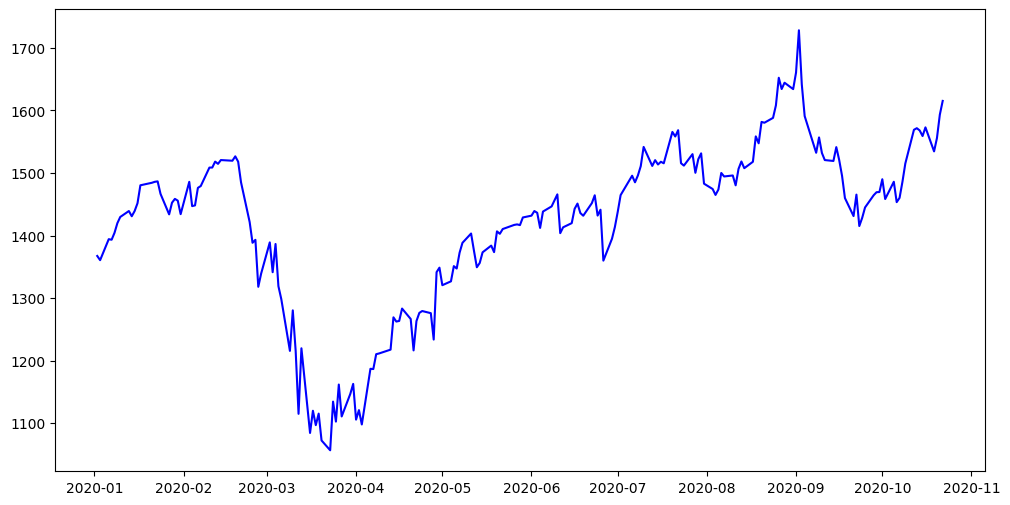

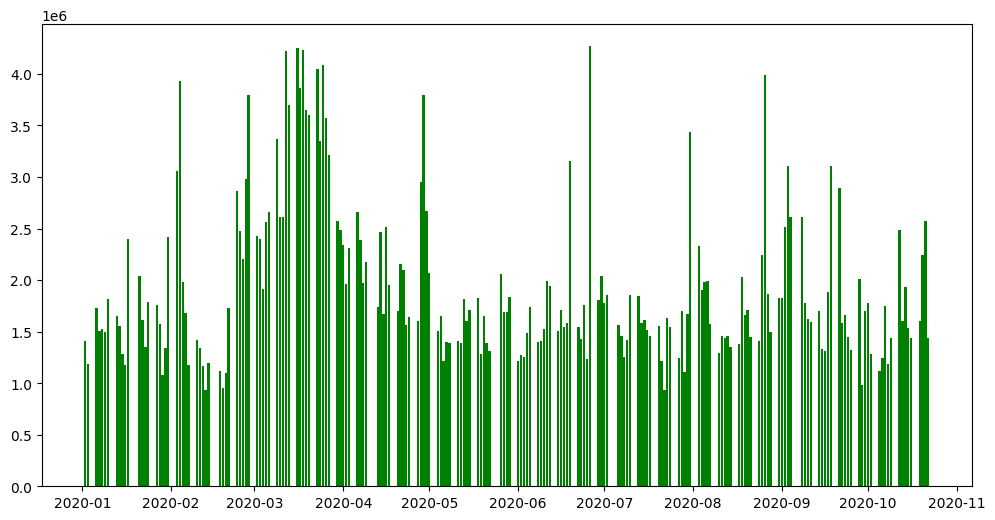

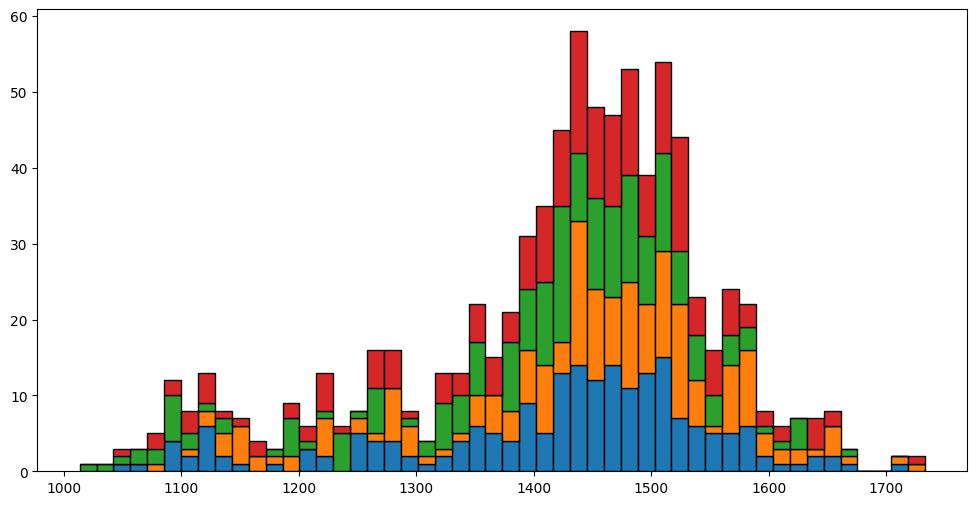

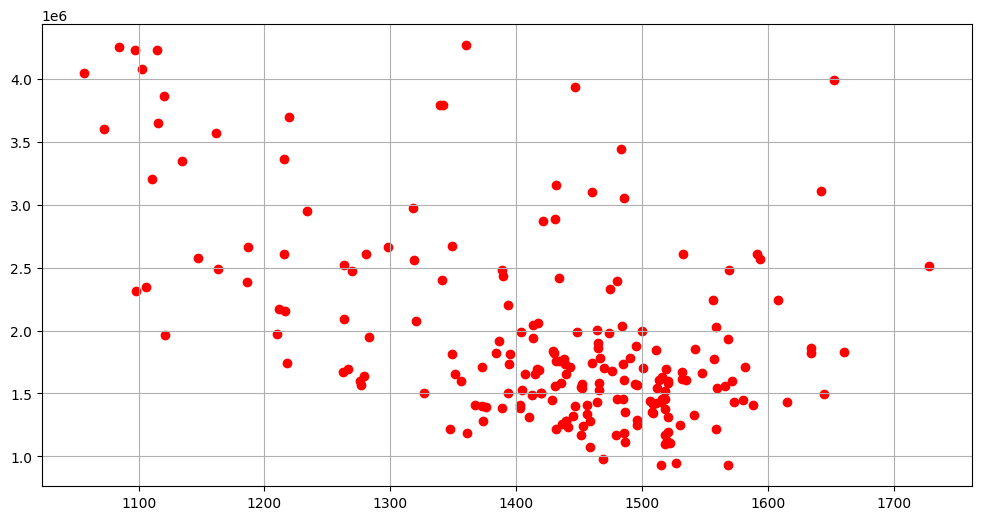

In [4]:
start_date = '2020-01-01'
end_date = '2020-10-22'
df_range = df.loc[start_date:end_date]

plt.figure(figsize=(12,6))
plt.plot(df_range.index,df_range['Close'],color='Blue',label="close price")
plt.show()

plt.figure(figsize=(12,6))
plt.bar(df_range.index,df_range['Volume'],color='green',label="Trade Volume")
plt.show()

#Histogram
price=[df_range['Open'],df_range['High'],df_range['Low'],df_range['Close']]
label=['Open','High','Low','Close']

plt.figure(figsize=(12,6))
plt.hist(price,bins=50,stacked=True,label=label,edgecolor='Black')
plt.show()

plt.figure(figsize=(12,6))
plt.scatter(df_range['Close'],df_range['Volume'],color='red')
plt.grid()
plt.show()

In [9]:
'''44. Handle the given datasets with adequate preprocessing steps mentioned and visualize the
dataset with appropriate graphs.
a. Handle Missing Data Values
b. Encode the categorical data
c. Scale your features
d. Normalize the data (if necessary)
Download the Datasets: Titanic Dataset, Diabetes Dataset, Breast Cancer Wisconsin
(Diagnostic) Dataset from online repositories.'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder



True
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

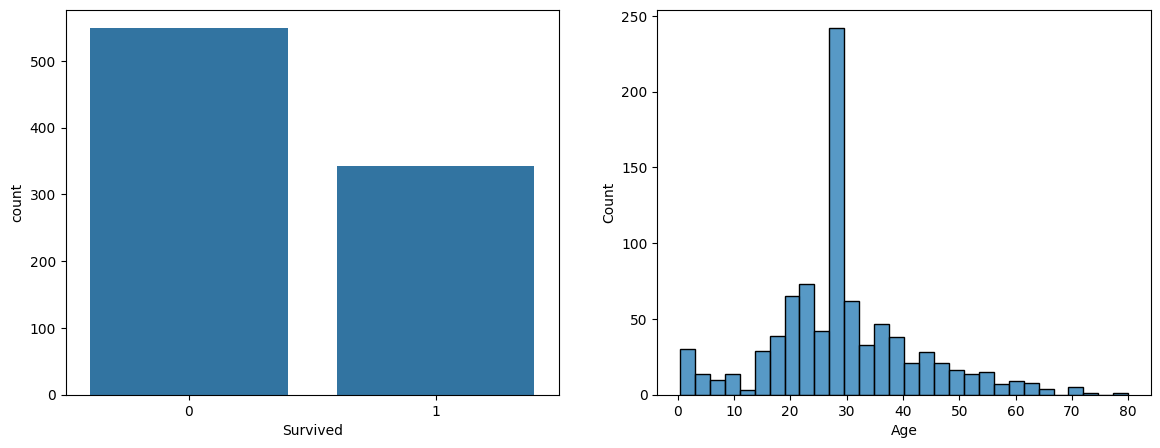

In [28]:
try:
  df = pd.read_csv('Titanic-Dataset.csv')
except FileNotFoundError:
  print("File not found")

#how to check for missing data
print(df.isnull().values.any())
print(df.isnull().sum())

#how to fill the missign data
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin','PassengerId','Name','Ticket'],inplace=True)

print(df.isnull().sum())

df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)
x=df.drop('Survived',axis=1)
y=df['Survived']
scalar=MinMaxScaler()
X_scaled=scalar.fit_transform(x)
X_scaled=pd.DataFrame(X_scaled,columns=x.columns)

#visuallaisation
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(x='Survived',data=df,ax=axes[0])

sns.histplot(data=df,x='Age',ax=axes[1])

In [2]:
"""45. Evaluate the dataset (User_Data.csv) and predict whether a user will purchase the
company’s product or not.
a. Compare the performance of any 3 classification models."""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from matplotlib.colors import ListedColormap


In [9]:
try:
    df = pd.read_csv('User_Data.csv')
except FileNotFoundError:
    print("Error: 'User_Data.csv' not found.")
    exit()

In [10]:
#remove the coloumn user id
df=df.drop('User ID' ,axis=1)

In [11]:
#make male and femail to 0 1
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [13]:
x=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']

In [14]:
#spliting the data set to traning and test data set
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)

In [33]:
models={
    "LogisticRegression":LogisticRegression(random_state=42),
    "KNN":KNeighborsClassifier(n_neighbors=5),
    "SVM":SVC(kernel='rbf',random_state=42)

}

In [34]:
for name,model in models.items():
  model.fit(X_train_scaled,Y_train)
  y_pred=model.predict(X_test_scaled)

  accuracy=accuracy_score(Y_test,y_pred)
  report=classification_report(Y_test,y_pred)
  print(f"--- {name} ---")
  print(f"Accuracy: {accuracy:.4f}")
  print("Classification Report:")
  print(report)
  print("Confusion Matrix:")
  print(confusion_matrix(Y_test, y_pred))

--- LogisticRegression ---
Accuracy: 0.8600
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100

Confusion Matrix:
[[61  2]
 [12 25]]
--- KNN ---
Accuracy: 0.9200
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.87      0.92      0.89        37

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100

Confusion Matrix:
[[58  5]
 [ 3 34]]
--- SVM ---
Accuracy: 0.9300
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94   

In [20]:
X_vis=df[['Age','EstimatedSalary']]
y_vis=df['Purchased']

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.25, random_state=42)
scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)


In [25]:
from mlxtend.plotting import plot_decision_regions

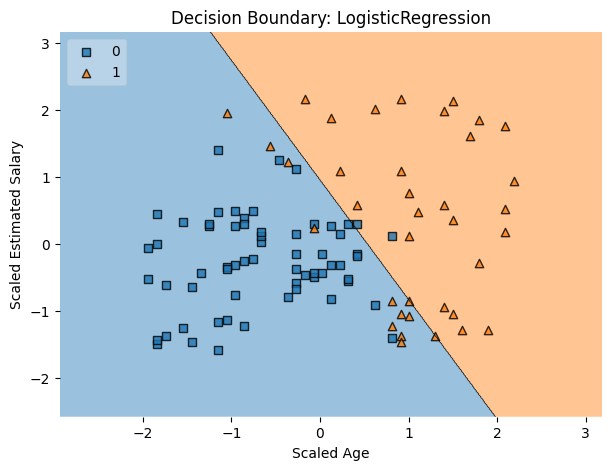

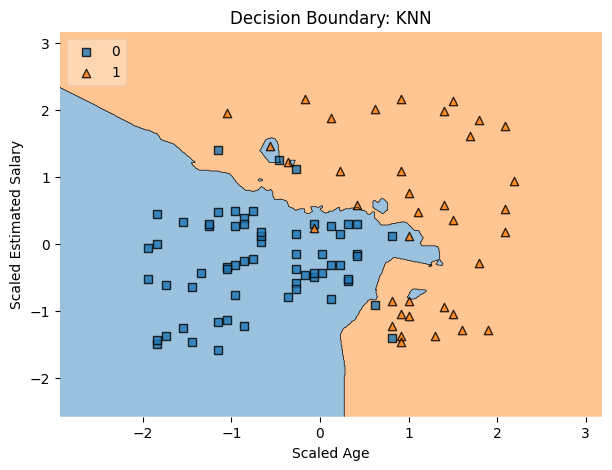

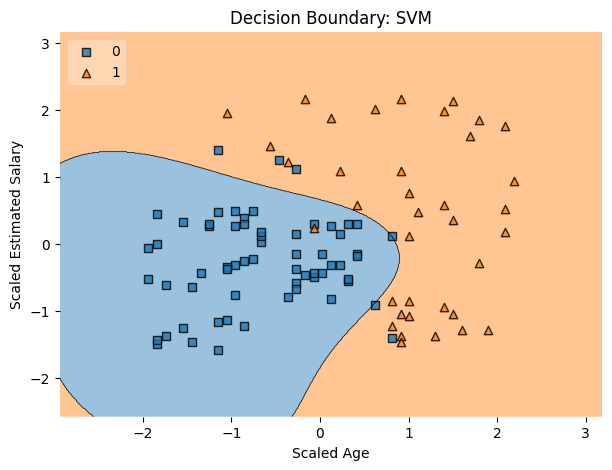

In [37]:
# Train and plot decision boundaries on the 2D visualization dataset
y_test_vis_np = y_test_vis.to_numpy()

for name, model in models.items():
    model.fit(X_train_vis_scaled, y_train_vis)
    plt.figure(figsize=(7,5))
    plot_decision_regions(X_test_vis_scaled, y_test_vis_np, clf=model, legend=2)
    plt.xlabel("Scaled Age")
    plt.ylabel("Scaled Estimated Salary")
    plt.title(f"Decision Boundary: {name}")
    plt.show()
